# Installing Dependencies

In [3]:
!pip install aqme numpy pandas matplotlib torch wget seaborn scikit-learn transformers
!conda install -y -c conda-forge openbabel=3.1.1


  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 2

# Importing Packages

In [2]:
# General
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import torch
#import torch.nn as nn
#from torch.utils.data import Dataset

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import rdkit.Chem as Chem

# For CSEARCH
import os
import glob
from pathlib import Path
from aqme.csearch import csearch
from aqme.qprep import qprep

# Downloading Dataset

In [7]:
!python -m wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv


Saved under delaney-processed.csv


In [3]:
data = "delaney-processed.csv"
df = pd.read_csv(data)
df = df.rename(columns={"smiles":"SMILES"})
print(f"There are {df.shape[0]} molecules in the dataset")

There are 1128 molecules in the dataset


In [4]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,SMILES
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


# Consolidating Dataset

In [8]:
n_compounds = 95

comp_indices = np.random.choice(df.shape[0], n_compounds, replace = False)

columns = ["Compound ID", "SMILES"]

smiles_df = df.iloc[comp_indices][columns]

smiles_df = smiles_df.rename(columns = {"Compound ID":"code_name"})

smiles_df["code_name"] = smiles_df["code_name"].str.replace(" ", "_")

smiles_df.head()

,code_name,SMILES
277,Ethanethiol,CCS
925,RTI_6,CCN2c1nc(N(C)(CCO))ccc1NC(=O)c3cccnc23
923,Dibutyl_ether_,CCCCOCCCC
17,Benzonitrile,N#Cc1ccccc1
192,Propoxur,CNC(=O)Oc1ccccc1OC(C)C


# CSEARCH Batch Conformational Sampling

In [10]:
import os, glob
from pathlib import Path
from aqme.csearch import csearch
from aqme.qprep import qprep

# Ideal for ML or big data projects, only need to replace smi and name with CSV input
csv_input = 'smiles_dataset.csv'
sdf_folder = 'ML_dataset'
w_dir_main = Path(os.getcwd())
sdf_path = w_dir_main.joinpath(sdf_folder)

# create conformers for all the entries in the CSV
csearch(destination=sdf_path,program='rdkit',input=csv_input)

# set SDF filenames and directory where the new com files will be created
com_path = sdf_path.joinpath(f'com_files')
sdf_rdkit_files = glob.glob(f'{sdf_path}/*.sdf')

# create COM files
qprep(destination=com_path,files=sdf_rdkit_files,program='gaussian',
        qm_input='HF/STO-3G opt freq',mem='2GB',nprocs=1)

AQME v 1.7.1 2025/04/22 09:56:45 
Citation: AQME v 1.7.1, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T.; Paton, R. AQME: Automated Quantum Mechanical Environments for Researchers and Educators. Wiley Interdiscip. Rev. Comput. Mol. Sci. 2023, 13, e1663 (DOI: 10.1002/wcms.1663).



Starting CSEARCH with 95 job(s) (SDF, XYZ, CSV, etc. files might contain multiple jobs/structures inside)



   ----- Ethanethiol -----


   ----- RTI_6 -----


o  Starting RDKit conformer sampling (Ethanethiol)


   ----- Dibutyl_ether_ -----


o  Starting RDKit conformer sampling (RTI_6)


   ----- Benzonitrile -----


o  Starting RDKit conformer sampling (Dibutyl_ether_)


o  Starting RDKit conformer sampling (Benzonitrile)


o  Applying filters to initial conformers (Benzonitrile)


o  Applying filters to initial conformers (Ethanethiol)


   ----- Propoxur -----


   ----- 1-Methylfluorene -----


o  Starting RDKit conformer sampling (Propoxur)


o  Starting RDKit conformer sampling 

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

df = pd.read_csv("smiles_dataset.csv")

df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)

df.head()

,code_name,SMILES,mol
0,Ethanethiol,CCS,<rdkit.Chem.rdchem.Mol object at 0x00000269563...
1,RTI_6,CCN2c1nc(N(C)(CCO))ccc1NC(=O)c3cccnc23,<rdkit.Chem.rdchem.Mol object at 0x00000269563...
2,Dibutyl_ether_,CCCCOCCCC,<rdkit.Chem.rdchem.Mol object at 0x00000269564...
3,Benzonitrile,N#Cc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000269564...
4,Propoxur,CNC(=O)Oc1ccccc1OC(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000269564...


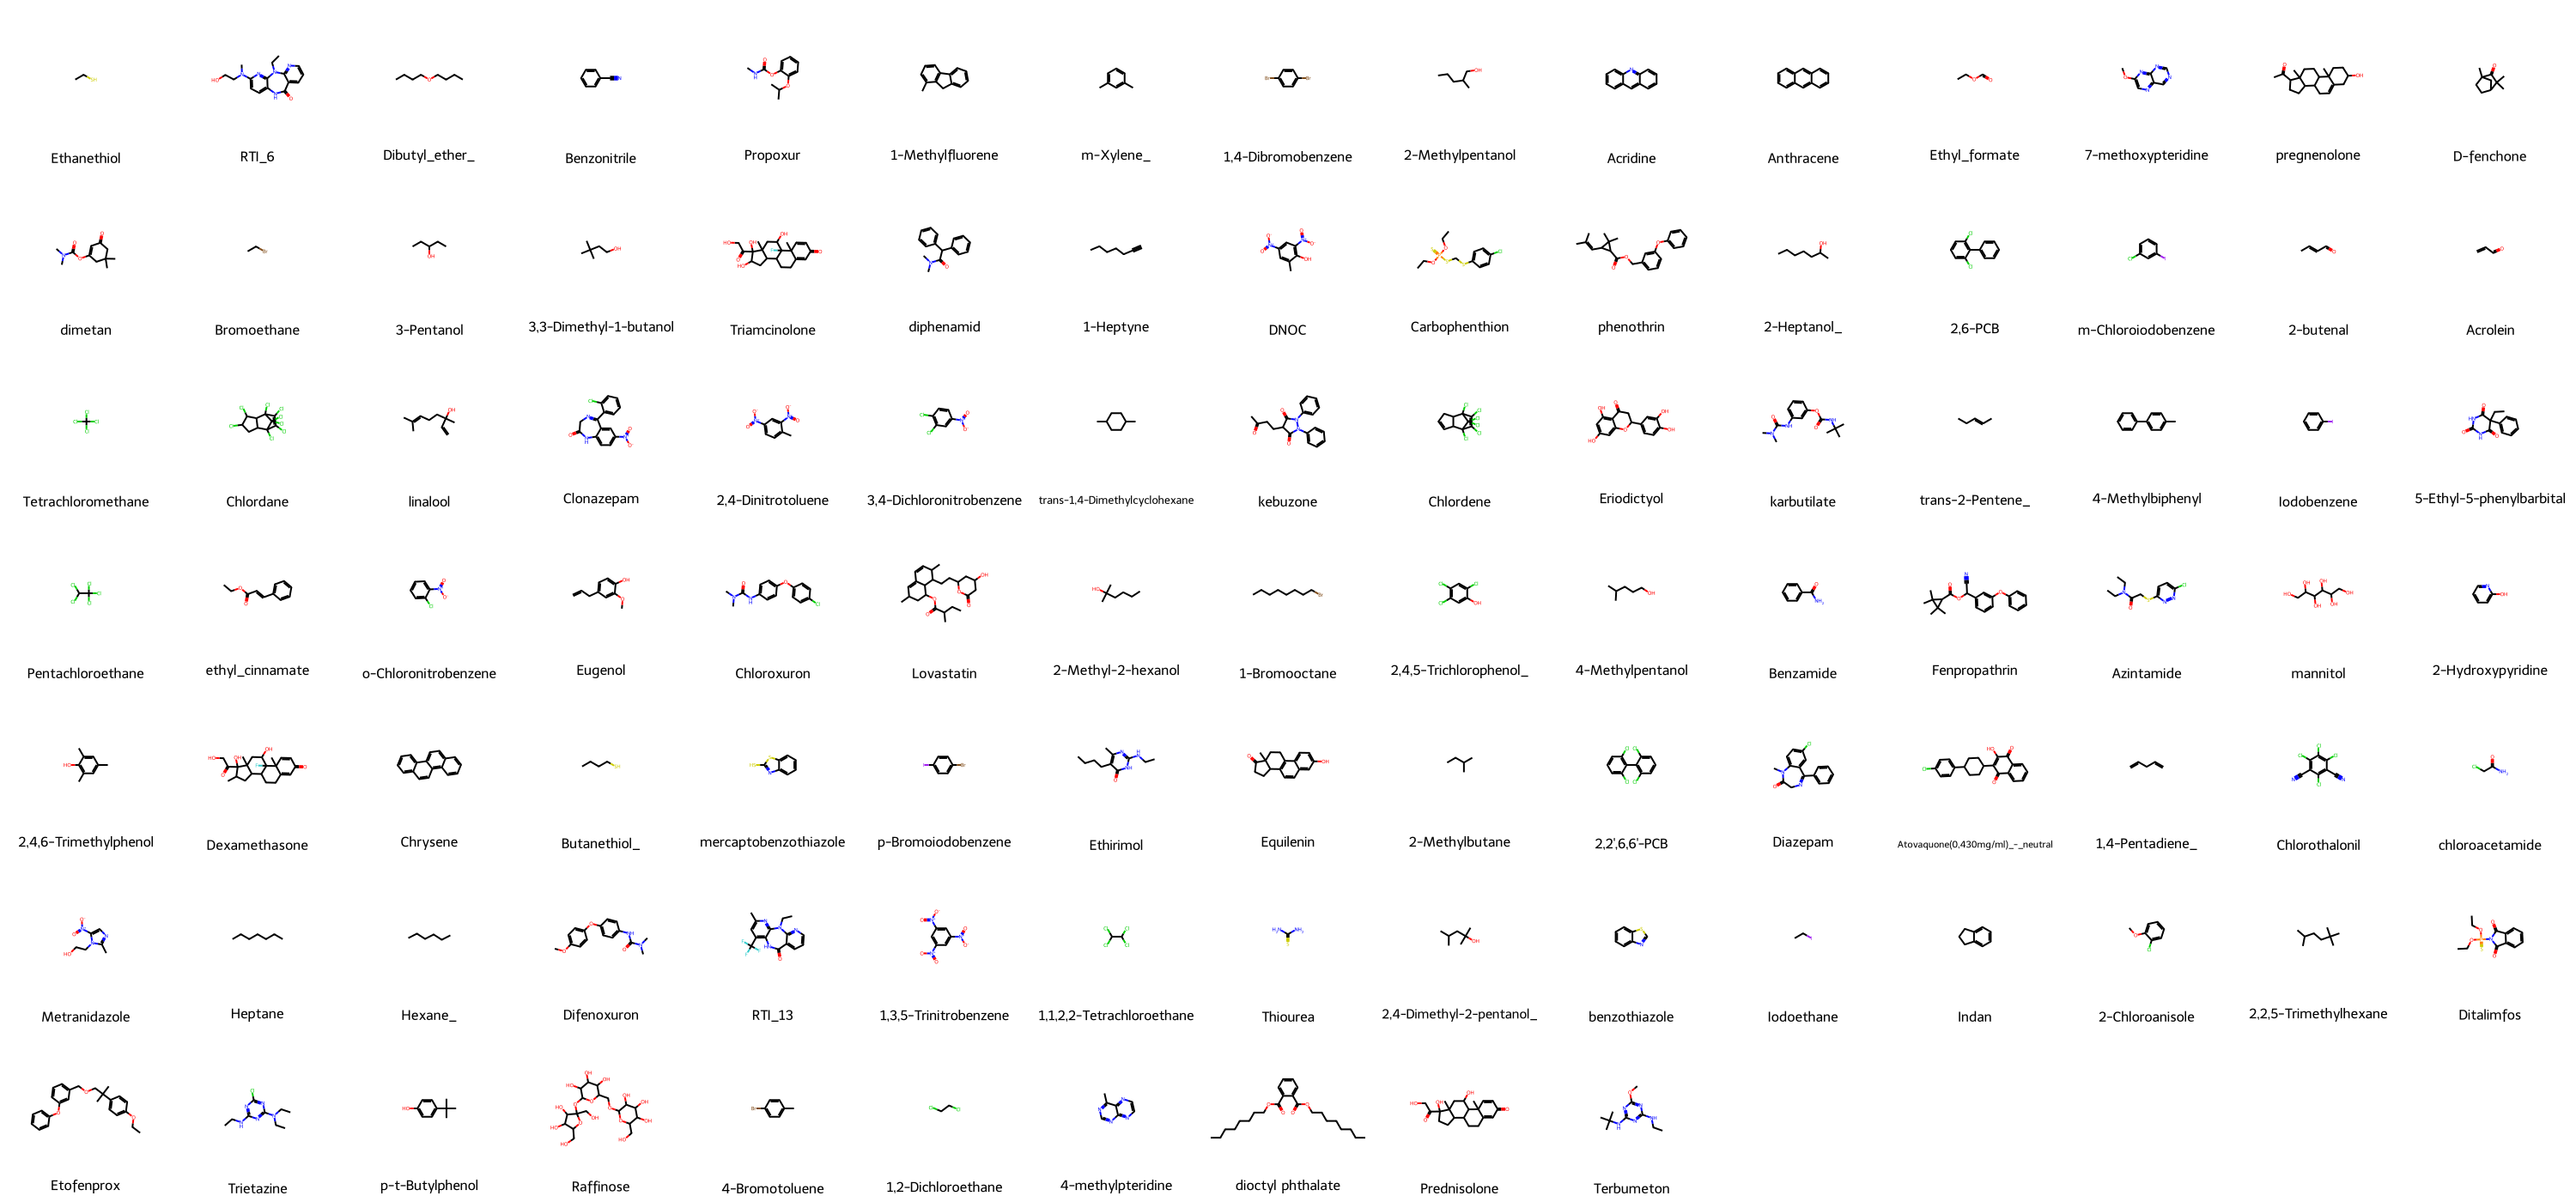

In [16]:
mols = df["mol"].tolist()
legends = df["code_name"].tolist()
img = Draw.MolsToGridImage(mols, molsPerRow = 15, subImgSize = (200,200), legends = legends, maxMols = 100)
img